In [1]:
import pandas as pd
import openml
import data_preprocess as dp

data_name = 'hcdr_main'

data = openml.datasets.get_dataset(45567)

X, y, categorical_indicator, attribute_names = data.get_data(
    target=data.default_target_attribute, dataset_format="dataframe"
)

c:\users\amr20\appdata\local\programs\python\python38\lib\site-packages\openml\datasets\functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


# Data Preprocessing

In [2]:
from copy import deepcopy

categorical = [b for a, b in zip(categorical_indicator, attribute_names) if a]
numerical = [b for a, b in zip(categorical_indicator, attribute_names) if not a]

encoded_data = deepcopy(X)

for col in categorical:
    
    mapping = {c: i+1 for i, c in enumerate(encoded_data[col].unique())}
    encoded_data[col] = encoded_data[col].replace(mapping)

encoded_data = encoded_data[numerical + categorical]
encoded_data.fillna(0, inplace=True)
encoded_data

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,...,1,1,1,1,1,1,1,1,1,1
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,...,1,1,1,1,1,1,1,1,1,1
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,...,1,1,1,1,1,1,1,1,1,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,...,1,1,1,1,1,1,1,1,1,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,-8456.0,-1982.0,...,1,1,1,1,1,1,1,1,1,1
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,-4388.0,-4090.0,...,1,1,1,1,1,1,1,1,1,1
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,-6737.0,-5150.0,...,1,1,1,1,1,1,1,1,1,1
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,-2562.0,-931.0,...,1,1,1,1,1,1,1,1,1,1


In [3]:
mapping = {b: int(i) for i, b in enumerate(y.unique())}


y = y.replace(mapping)
y

0         0
1         1
2         1
3         1
4         1
         ..
307506    1
307507    1
307508    1
307509    0
307510    1
Name: TARGET, Length: 307511, dtype: int64

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

train_data, left_out, train_label, y_left_out = train_test_split(encoded_data, y, test_size=0.1, random_state=42)
test_data, dev_data, test_label, dev_label = train_test_split(left_out, y_left_out, test_size=0.5, random_state=42)

print(f'train shape: {train_data.shape}\n test shape: {test_data.shape}\n dev shape: {dev_data.shape}')

train shape: (276759, 120)
 test shape: (15376, 120)
 dev shape: (15376, 120)


In [5]:
from copy import deepcopy

r_train_data = deepcopy(train_data)

In [6]:
from sklearn.preprocessing import Normalizer, StandardScaler

nn = StandardScaler()

nn.fit(train_data[numerical])

train_data[numerical] = nn.transform(train_data[numerical])
dev_data[numerical] = nn.transform(dev_data[numerical])
test_data[numerical] = nn.transform(test_data[numerical])

# Build graph

In [7]:
adj_matrix, index_to_name, name_to_index = dp.compute_adjacency_matrix(data=r_train_data, self_loop_weight=20, 
                                                                       categorical=categorical)

 60%|████████████████████████████████████████████████▌                                | 72/120 [02:32<01:31,  1.91s/it]c:\users\amr20\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
c:\users\amr20\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:4596: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))
100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [03:01<00:00,  1.51s/it]


In [8]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(train_data, train_label)

In [9]:
train = dp.transform_to_tensors(X_over, y_over, adj_matrix)

test = dp.transform_to_tensors(test_data, test_label, adj_matrix)

dev = dp.transform_to_tensors(dev_data, dev_label, adj_matrix)


torch.Size([508906, 120, 1])
torch.Size([508906])
torch.Size([15376, 120, 1])
torch.Size([15376])
torch.Size([15376, 120, 1])
torch.Size([15376])


In [10]:
from torch.utils.data import DataLoader
import torch

batch_size = 64

train_dataset = dp.Data(data=train)
val_dataset = dp.Data(data=dev)
test_dataset = dp.Data(data=test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

# Train IGNC

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [16]:
import torch
from ignc import train_model


gnn_model = train_model(adj_matrix=adj_matrix, 
            index_to_name=index_to_name,
            train_dataloader=train_dataloader,
            val_dataloader=val_dataloader,
            data_name=data_name,
            num_classes=1,
            dataframe=encoded_data, 
            categorical=categorical, 
            numerical=numerical,
            gnn_model=None, 
            optimizer_train=None, 
            current_epoch=1,
            num_epochs=100,
            learning_rate=1e-03,
            normalize_adj=False)


  0%|                                                                                         | 0/7952 [00:00<?, ?it/s]

Acc at dev is : 0.647
ROC is : 0.664,  prec 0.5516309194947197,  recall 0.6637978118798272, f-score 0.5046017411722138
Acc at epoch : 1 is : 0.6634604334831238, loss : 4892.203661590815


  0%|                                                                                         | 0/7952 [00:00<?, ?it/s]

Acc at dev is : 0.757
ROC is : 0.671,  prec 0.5671520739305873,  recall 0.6709102816202221, f-score 0.56440455936389
Acc at epoch : 2 is : 0.673265814781189, loss : 4814.471630066633


  0%|                                                                                         | 0/7952 [00:00<?, ?it/s]

Acc at dev is : 0.774
ROC is : 0.661296161872273,  prec 0.567816310258001,  recall 0.6612961618722729, f-score 0.5703227332590467
Acc at epoch : 3 is : 0.6746609210968018, loss : 4801.7116131186485


  0%|                                                                                         | 0/7952 [00:00<?, ?it/s]

Acc at dev is : 0.703
ROC is : 0.6701863798550267,  prec 0.5584340909117503,  recall 0.6701863798550265, f-score 0.535392547389705
Acc at epoch : 4 is : 0.6756454110145569, loss : 4793.509675592184


  0%|                                                                                         | 0/7952 [00:00<?, ?it/s]

Acc at dev is : 0.735
ROC is : 0.6691950689481643,  prec 0.5625366666264289,  recall 0.6691950689481643, f-score 0.5518471983851759
Acc at epoch : 5 is : 0.6762997508049011, loss : 4785.260957479477


  0%|                                                                                         | 0/7952 [00:00<?, ?it/s]

Acc at dev is : 0.729
ROC is : 0.6637795794383499,  prec 0.5598702558506123,  recall 0.6637795794383499, f-score 0.5468525372258902
Acc at epoch : 6 is : 0.6769521236419678, loss : 4777.27802285552


  0%|                                                                                         | 0/7952 [00:00<?, ?it/s]

Acc at dev is : 0.797
ROC is : 0.6532736604267414,  prec 0.5711680958791446,  recall 0.6532736604267414, f-score 0.5795527670169168
Acc at epoch : 7 is : 0.678188145160675, loss : 4767.106577724218


  4%|███▏                                                                           | 327/7952 [01:42<39:39,  3.20it/s]


KeyboardInterrupt: 

## Evaluate the trained model on the test set

In [13]:
import torch.nn as nn
from ignc import IGNC
from tqdm import tqdm



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = 1 
adj_matrix = torch.FloatTensor(adj_matrix)

gnn_model = IGNC(adj_matrix[0].shape[0], adj_matrix.to(device), 1, index_to_name, dataframe=encoded_data, 
            categorical=categorical, 
            numerical=numerical,).to(device)

torch.cuda.empty_cache()

gnn_model.load_state_dict(torch.load(f'{data_name}/{data_name}.model'))

print('*** Testing : ****')
gnn_model.eval()

correct = 0
count = 0
count_2 = 0

list_prediction = []
list_pob_pred = []
y_test = []

for i, data in tqdm(list(enumerate(test_dataloader))):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = gnn_model(inputs)
    list_pob_pred.extend(outputs.tolist())

    preds = (outputs.reshape(-1) > 0.5) * 1

    list_prediction.extend(preds.tolist())

    count+= torch.sum(preds == labels.data)

    for i in range(len(preds)):
        if preds[i] == labels[i] == 1:
            count_2 += 1

    y_test.extend(labels.tolist())

    torch.cuda.empty_cache()


roc = roc_auc_score(y_test, list_pob_pred)
prec = precision_score(y_test, list_prediction, average='macro')
recall = recall_score(y_test, list_prediction, average='macro')
f_score = f1_score(y_test, list_prediction, average='macro')

print('AUC is : {},  prec {},  recall {}, f-score {}' .format(roc, prec, recall, f_score))

  0%|                                                                                          | 0/241 [00:00<?, ?it/s]

*** Testing : ****


100%|████████████████████████████████████████████████████████████████████████████████| 241/241 [00:18<00:00, 12.82it/s]

AUC is : 0.74442234800538,  prec 0.5682265835685207,  recall 0.6716013523889637, f-score 0.565457208200165


# Explain one example

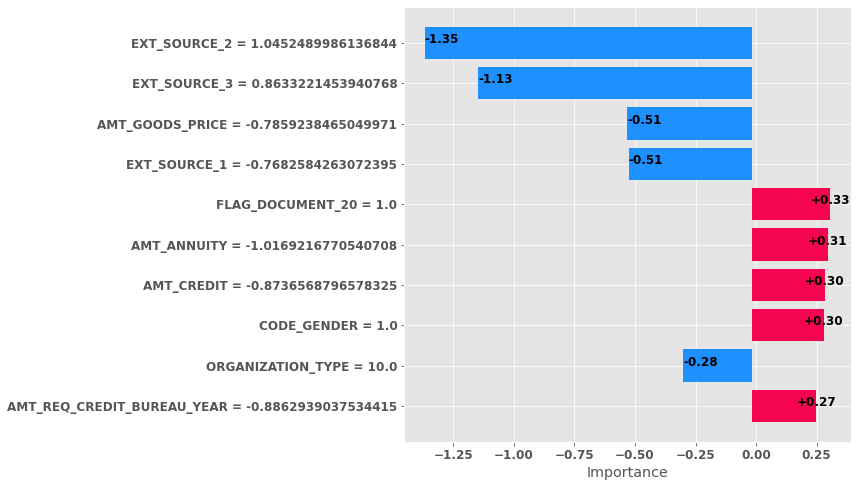

tensor([[0.2668]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [15]:
#num of features to use
top_n = 10

gnn_model.plot_bars(test[10][0].reshape(1, adj_matrix.shape[0], 1).to(device), test_data.iloc[0], top_n)
gnn_model.predict(test[10][0].reshape(1, adj_matrix.shape[0], 1).to(device))

# Interpretability Evaluation

In [16]:
importances = gnn_model.weights.cpu().detach().reshape(-1).numpy()

feature_global_importance = {}
for i, v in enumerate(importances):
    feature_global_importance[index_to_name[i]] = v

In [17]:
'''function to obtain feature scores from IGNNet model'''

def get_local_values(example, feature_global_importance, adj_matrix, index_to_name):
    array_to_use = np.array(example)    
    array = torch.FloatTensor(array_to_use).reshape(1, adj_matrix.shape[0], 1)
    local_importance = gnn_model.get_local_importance(array.to(device))[-1]

    names = []
    values = []
    for i, v in enumerate(local_importance):
        name = index_to_name[i]
        names.append(name)
        values.append(feature_global_importance[name]*v)
    return names, values

In [18]:
from sklearn.preprocessing import StandardScaler
from data_preprocess import BlackBoxWrapper


num_features = adj_matrix.shape[0]


bb = BlackBoxWrapper(gnn_model, num_features, device)

def black_box(x, S):
    pred = bb(x, S)
    return pred.cpu().data.numpy()

In [19]:
'''
Evaluate a black-box model.
  x: input examples.
  S: coalitions.
'''

x = test_dataset[0][0]
x = x.reshape((1,x.shape[0])).numpy()

'''compute the feature scores on a vector of all features masked'''
S = np.zeros_like(x)
_, null =  get_local_values(S, feature_global_importance, adj_matrix, index_to_name)

## Explain 500 examples and compare KernelSHAP to IGNNet after each iteration of data sampling

In [20]:
from tqdm import tqdm
import shapreg
import pickle
import os.path
from numpy.linalg import norm
from scipy.stats import spearmanr
import copy

if os.path.isfile(f'{data_name}/{data_name}_exp.pickle'):
    print('Loading saved explanations')

    with open(f'{data_name}/{data_name}_exp.pickle', 'rb') as file:
        all_instance_results_loaded = pickle.load(file)
        
    all_l2_distances = []
    all_cos_sim = []
    all_spearman_c = []

    for x, all_results in tqdm(all_instance_results_loaded):

        _, true_values = get_local_values(x, feature_global_importance, adj_matrix, index_to_name)
        
        instance_l2_dis = []
        instance_cos_sim = []
        spearman_c = []
        
        '''the Shapley values for an input x sum to the difference p(y=1 | x) - p(y=1)'''
        true_values = np.array(true_values) - null

        for i in list(all_results['iters']):

            knl_shp = all_results['values'][list(all_results['iters']).index(i)].reshape(-1)

            instance_l2_dis.append(norm(true_values - knl_shp))
            instance_cos_sim.append(np.dot(true_values, knl_shp)/(norm(true_values)*norm(knl_shp)))
            coef, p = spearmanr(true_values, knl_shp)
            spearman_c.append(coef)
            
        all_l2_distances.append(instance_l2_dis)
        all_cos_sim.append(instance_cos_sim)
        all_spearman_c.append(spearman_c)

else:
    
    all_l2_distances = []
    all_cos_sim = []
    all_instance_results = []
    all_spearman_c = []

    count = 1
    for x_, _ in tqdm(test_dataset):
        _, true_values = get_local_values(x_, feature_global_importance, adj_matrix, index_to_name)

        x = x_.reshape((1,x_.shape[0])).numpy()

        # Run KernelSHAP to convergence
        game_ = shapreg.games.PredictionGame(black_box, x)
        try:
            '''more examples are available here'''
            shap_values, all_results = shapreg.shapley.ShapleyRegression(
                game_, batch_size=32, n_samples=2000, paired_sampling=True, detect_convergence=False,
                bar=False, return_all=True)
        except:
            print('Singularity exception!')
            continue

        instance_l2_dis = []
        instance_cos_sim = []
        spearman_c = []

        '''the Shapley values for an input x sum to the difference p(y=1 | x) - p(y=1)'''
        true_values = np.array(true_values) - null

        for i in list(all_results['iters']):

            knl_shp = all_results['values'][list(all_results['iters']).index(i)].reshape(-1)

            instance_l2_dis.append(norm(true_values - knl_shp))
            instance_cos_sim.append(np.dot(true_values, knl_shp)/(norm(true_values)*norm(knl_shp)))
            coef, p = spearmanr(true_values, knl_shp)
            spearman_c.append(coef)
            
        all_l2_distances.append(instance_l2_dis)
        all_cos_sim.append(instance_cos_sim)
        all_spearman_c.append(spearman_c)

        all_instance_results.append((copy.deepcopy(x_), copy.deepcopy(all_results)))
        
        count += 1
        if count > 500:
            break
    print('saving explanations')

    with open(f'{data_name}/{data_name}_exp.pickle', 'wb') as file:
        pickle.dump(all_instance_results, file)


Loading saved explanations


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:25<00:00, 19.98it/s]


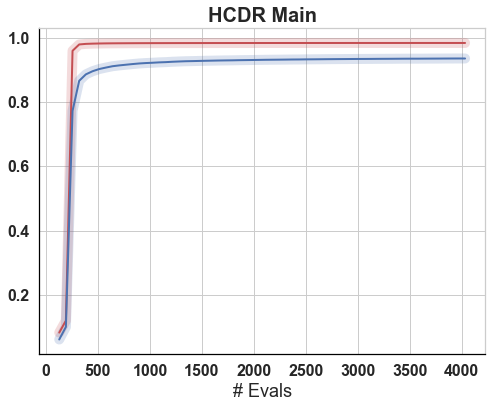

In [21]:


'''Plot the computed similarity scores'''

mean_cos_sim = np.mean(all_cos_sim, axis=0)
mean_spearman_c = np.mean(all_spearman_c, axis=0)

import matplotlib.pyplot as plt  
# Plot the line graph
import seaborn as sb
sb.set(rc={'figure.figsize':(8,6)})
sb.set_theme(style='whitegrid')

plt.plot(all_results['iters'], mean_cos_sim, "r-", linewidth=10, alpha=0.2)
plt.plot(all_results['iters'], mean_spearman_c, "b-", linewidth=10, alpha=0.2)

plt.plot(all_results['iters'], mean_cos_sim, "r-", label='Cosine Similarity', linewidth=2)
plt.plot(all_results['iters'], mean_spearman_c, "b-", label='Spearman Correlation', linewidth=2)

# Add labels and title
plt.xlabel('# Evals', fontsize=18)
#plt.ylabel('Mean Value', fontsize=18)
plt.title(f'HCDR Main', fontsize=20, fontweight='bold')
#plt.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


ax = plt.gca()

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Display the graph
plt.show()